## Importing the libraries:

In [7]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

## Store the website into a variable:

In [8]:
url = "https://www.cars24.com/buy-used-car?f=make%3A%3D%3Atoyota&sort=bestmatch&serveWarrantyCount=true&listingSource=TabFilter&storeCityId=2378"

## Request the URL:

In [9]:
response = requests.get(url)

## To check we use Status Code:

In [10]:
response.status_code

200

## We need to create a Soup object:

In [11]:
soup = BeautifulSoup(response.text, "lxml")

In [12]:
print(soup)

<!DOCTYPE html>
<html lang="en-IN">
<head>
<link href="https://assets.cars24.com" rel="preconnect"/>
<link href="https://fastly-production.24c.in" rel="preconnect"/>
<link href="https://connect.facebook.net" rel="preconnect"/>
<link href="https://www.googletagmanager.com" rel="preconnect"/>
<link href="https://www.google-analytics.com" rel="preconnect"/>
<link href="https://analytics.twitter.com" rel="preconnect"/>
<link href="https://www.facebook.com" rel="preconnect"/>
<link href="https://www.google.com" rel="preconnect"/>
<link href="https://www.google.co.in" rel="preconnect"/>
<link href="https://googleads.g.doubleclick.net" rel="preconnect"/>
<link href="https://t.co" rel="preconnect"/>
<link href="https://static.ads-twitter.com" rel="preconnect"/>
<link href="https://tracking.cars24.com" rel="preconnect"/>
<link href="https://www.googleoptimize.com" rel="preconnect"/>
<link href="https://web-sdk.smartlook.com" rel="preconnect"/><meta charset="utf-8"/><meta content="width=device-w

 # Data Collection:

## car_name:

In [13]:
names = soup.find_all("h3", class_ = "_11dVb")

In [14]:
car_names = []
for i in names:
    name = i.text
    categorical_name = name[5:] if name[:4].isdigit() and name[4] == ' ' else name
    car_names.append(categorical_name)

In [15]:
print(car_names)
len(car_names)

['Toyota Etios Liva G', 'Toyota YARIS VX MT', 'Toyota URBAN CRUISER PREMIUM GRADE MT', 'Toyota Etios Liva G', 'Toyota URBAN CRUISER PREMIUM GRADE AT', 'Toyota Etios Liva G', 'Toyota Corolla Altis VL CVT PETROL', 'Toyota Corolla Altis VL CVT PETROL', 'Toyota Glanza G CVT', 'Toyota Corolla Altis VL CVT PETROL', 'Toyota Glanza V CVT', 'Toyota Corolla Altis VL CVT PETROL', 'Toyota Glanza V CVT', 'Toyota Glanza G CVT', 'Toyota Etios Liva G', 'Toyota URBAN CRUISER HIGH GRADE AT', 'Toyota Innova 2.5 GX 8 STR', 'Toyota Etios Liva G', 'Toyota Etios Liva G']


19

## Kilometers_Driven:

In [16]:
km_elements = soup.find_all("ul", class_ = "_3J2G-")
print(km_elements)

[<ul class="_3J2G-"><li>52,656 km</li><li class="_3W_AJ"></li><li>Petrol</li><li class="_3W_AJ"></li><li>Manual</li></ul>, <ul class="_3J2G-"><li>30,509 km</li><li class="_3W_AJ"></li><li>Petrol</li><li class="_3W_AJ"></li><li>Manual</li></ul>, <ul class="_3J2G-"><li>18,001 km</li><li class="_3W_AJ"></li><li>Petrol</li><li class="_3W_AJ"></li><li>Manual</li></ul>, <ul class="_3J2G-"><li>79,643 km</li><li class="_3W_AJ"></li><li>Petrol</li><li class="_3W_AJ"></li><li>Manual</li></ul>, <ul class="_3J2G-"><li>33,986 km</li><li class="_3W_AJ"></li><li>Petrol</li><li class="_3W_AJ"></li><li>Automatic</li></ul>, <ul class="_3J2G-"><li>77,595 km</li><li class="_3W_AJ"></li><li>Petrol</li><li class="_3W_AJ"></li><li>Manual</li></ul>, <ul class="_3J2G-"><li>74,221 km</li><li class="_3W_AJ"></li><li>Petrol</li><li class="_3W_AJ"></li><li>Automatic</li></ul>, <ul class="_3J2G-"><li>56,595 km</li><li class="_3W_AJ"></li><li>Petrol</li><li class="_3W_AJ"></li><li>Automatic</li></ul>, <ul class="_3J

In [17]:
Kilometers_driven = []

for i in km_elements:
    full_text = i.text
    km = full_text.split(' km')[0]  if ' km' in full_text else None
    if km:
        Kilometers_driven.append(km)

In [18]:
print(Kilometers_driven)
len(Kilometers_driven)

['52,656', '30,509', '18,001', '79,643', '33,986', '77,595', '74,221', '56,595', '16,870', '77,581', '56,916', '61,520', '15,816', '21,695', '75,420', '45,799', '89,683', '23,685', '30,154']


19

## year:

In [19]:
year = soup.find_all("h3", class_ = "_11dVb")

In [20]:
years = []
for i in year:
    name = i.text
    year = name[:4] if name[:4].isdigit() else None
    if year:
        years.append(year)
    

In [21]:
print(years)
print(len(years))

['2012', '2018', '2021', '2011', '2022', '2011', '2018', '2017', '2019', '2018', '2020', '2017', '2019', '2019', '2011', '2021', '2012', '2014', '2013']
19


## price:

In [ ]:
price = soup.find_all("strong", class_ = "_3RL-I")

In [ ]:
prices = []
for i in price:
    price_text = i.text.strip()
    price_num = float(price_text.replace('₹', '').replace(' Lakh', '')) * 100000
    
    price_num_rounded = round(price_num, )
    prices.append(price_num_rounded)

In [ ]:
print(prices)
len(prices)

## fuel_types:

In [ ]:
fuel_elements = soup.find_all("ul", class_ = "_3J2G-")
print(fuel_elements)

In [ ]:
fuel_types = []
for i in fuel_elements:
    full_text = i.text
    if 'Petrol' in full_text:
        fuel_type = 'Petrol'
    elif 'Diesel' in full_text:
        fuel_type = 'Diesel'
    else:
        fuel_type = 'Unknown' 
    fuel_types.append(fuel_type)
    


In [ ]:
print(fuel_types)
len(fuel_types)

## transmissions:

In [ ]:
trans_elements = soup.find_all("ul", class_ = "_3J2G-")
print(trans_elements)

In [ ]:
transmissions = []
for i in trans_elements:
    full_text = i.text
    if 'Manual' in full_text:
        transmission = 'Manual'
    elif 'Automatic' in full_text:
        transmission = 'Automatic'
    else:
        transmission = 'Unknown' 
    transmissions.append(transmission)
    

In [ ]:
print(transmissions)
len(transmissions)

# Create a Data Frame

In [ ]:
data = {
    'Car_Name': car_names,
    'Kilometers_Driven': Kilometers_driven,
    'Fuel_Type': fuel_types,
    'Price': prices,
    'Year': years,
    'Transmission': transmissions
}

df = pd.DataFrame(data)

print(df)

In [ ]:
df

## Open the csv file:

In [2]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('toyoto_car_data.csv')

In [4]:
df

,Car_Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Price
0,Toyota Etios Liva G,2012,52656,Petrol,Manual,237000
1,Toyota YARIS VX MT,2018,30509,Petrol,Manual,783000
2,Toyota URBAN CRUISER PREMIUM GRADE MT,2021,18001,Petrol,Manual,957000
3,Toyota Etios Liva G,2011,79643,Petrol,Manual,233000
4,Toyota URBAN CRUISER PREMIUM GRADE AT,2022,33986,Petrol,Automatic,1011000
5,Toyota Etios Liva G,2011,77595,Petrol,Manual,247000
6,Toyota Corolla Altis VL CVT PETROL,2018,74221,Petrol,Automatic,978000
7,Toyota Corolla Altis VL CVT PETROL,2017,56595,Petrol,Automatic,1033000
8,Toyota Glanza G CVT,2019,16870,Petrol,Automatic,679000
9,Toyota Corolla Altis VL CVT PETROL,2018,77581,Petrol,Automatic,1000000


In [4]:
df.head()

,Car_Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Price
0,Toyota Etios Liva G,2012,52656,Petrol,Manual,237000
1,Toyota YARIS VX MT,2018,30509,Petrol,Manual,783000
2,Toyota URBAN CRUISER PREMIUM GRADE MT,2021,18001,Petrol,Manual,957000
3,Toyota Etios Liva G,2011,79643,Petrol,Manual,233000
4,Toyota URBAN CRUISER PREMIUM GRADE AT,2022,33986,Petrol,Automatic,1011000


In [5]:
df.tail()

,Car_Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Price
13,Toyota Glanza G CVT,2019,21695,Petrol,Automatic,728000
14,Toyota Etios Liva G,2013,30154,Petrol,Manual,251000
15,Toyota Etios Liva G,2011,75420,Petrol,Manual,258000
16,Toyota Innova 2.5 GX 8 STR,2012,89683,Diesel,Manual,660000
17,Toyota Etios Liva G,2014,23685,Petrol,Manual,333000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_Name           18 non-null     object
 1   Year               18 non-null     int64 
 2   Kilometers_Driven  18 non-null     int64 
 3   Fuel_Type          18 non-null     object
 4   Transmission       18 non-null     object
 5   Price              18 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 996.0+ bytes


In [7]:
df.nunique()

Car_Name              8
Year                 10
Kilometers_Driven    18
Fuel_Type             2
Transmission          2
Price                18
dtype: int64

In [8]:
df.describe()

,Year,Kilometers_Driven,Price
count,18.000000,18.000000,1.800000e+01
mean,2016.222222,49585.888889,6.631111e+05
std,3.734664,25725.270018,3.181995e+05
min,2011.000000,15816.000000,2.330000e+05
25%,2012.250000,25302.250000,2.767500e+05
50%,2017.500000,54625.500000,7.205000e+05
75%,2019.000000,75120.250000,9.727500e+05
max,2022.000000,89683.000000,1.042000e+06


In [9]:
df.isna().sum()

Car_Name             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Price                0
dtype: int64

In [10]:
df.duplicated().any()

False

# Data Preprocessing:

In [11]:
# creating list of categorical columns for one hot encoding
categorical_columns = [col for col in df.columns if df.dtypes[col] == 'object']

# creating list of numerical columns to standardized data 
numerical_columns = [col for col in df.columns if (df.dtypes[col] != 'object')]

print('Numerical Features are : ',numerical_columns)
print('\n')
print('Categorical Features are : ',categorical_columns)

Numerical Features are :  ['Year', 'Kilometers_Driven', 'Price']


Categorical Features are :  ['Car_Name', 'Fuel_Type', 'Transmission']


# Ouliers:

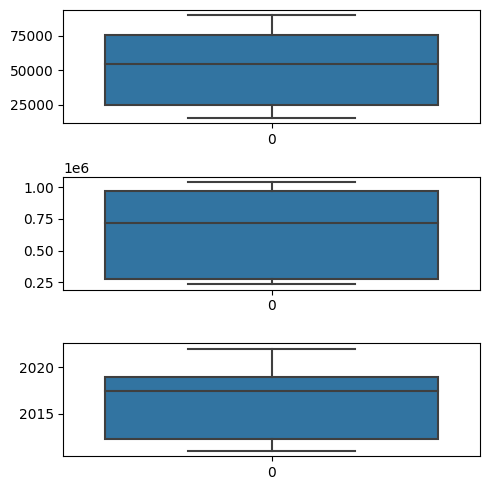

In [12]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['Kilometers_Driven'], ax = axs[0])
plt2 = sns.boxplot(df['Price'], ax = axs[1])
plt3 = sns.boxplot(df['Year'], ax = axs[2])
plt.tight_layout()

**Conclusion:** There are not that extreme values present in the dataset

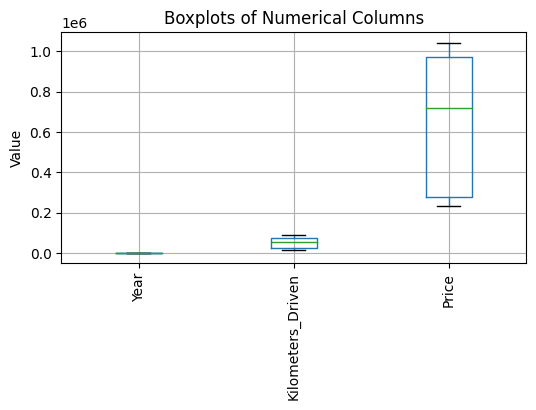

In [13]:
# Boxplots
plt.figure(figsize=(6, 3))
df.boxplot()
plt.title('Boxplots of Numerical Columns')
plt.ylabel('Value')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

# Eda:

<Axes: xlabel='Price', ylabel='Density'>

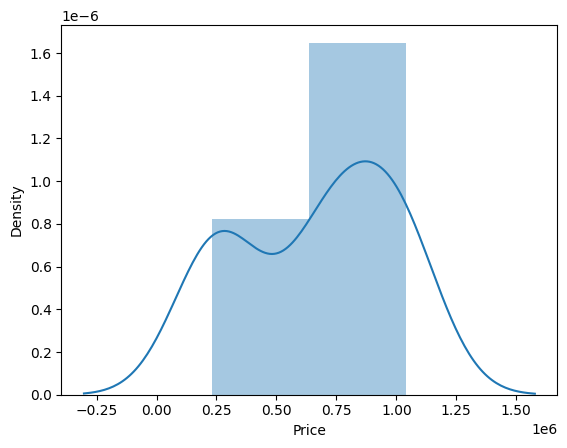

In [14]:
sns.distplot(df['Price'])

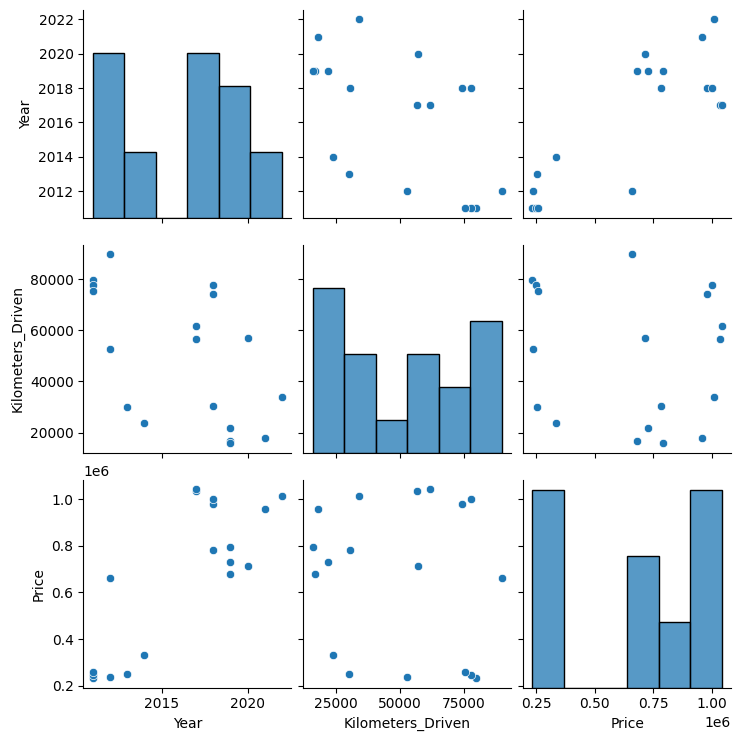

In [15]:
sns.pairplot(df)

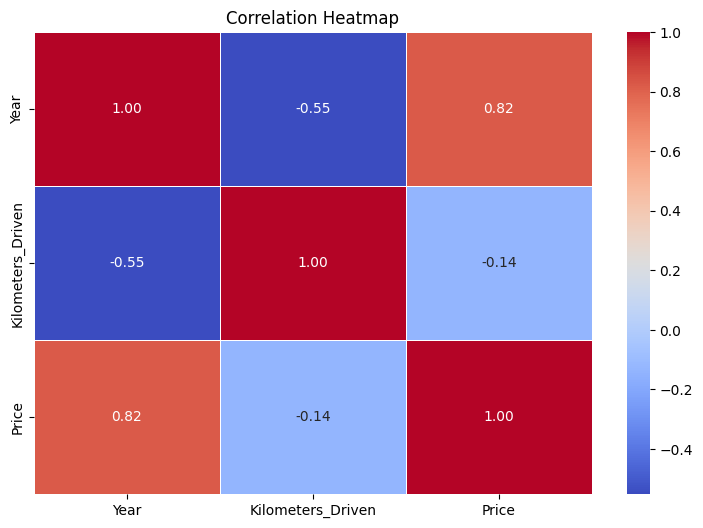

In [5]:
temp = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(9, 6))
sns.heatmap(temp.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

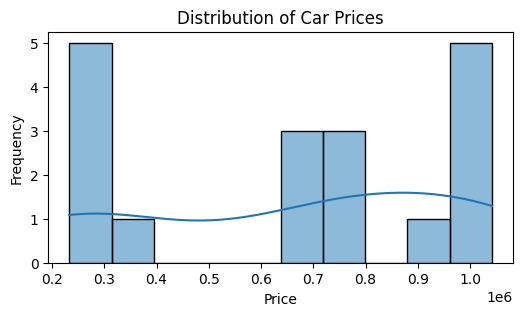

In [17]:
# Distribution of car prices
plt.figure(figsize=(6, 3))
sns.histplot(df['Price'], kde=True, bins=10)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

**Conclusion:** The price distribution is right-skewed, with most cars priced in the lower range and a few high-priced outliers.
Distribution of Car Manufacturing Years:

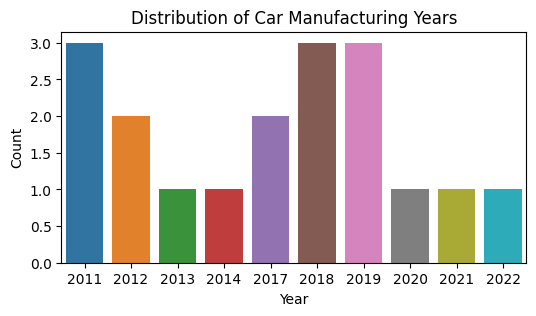

In [18]:
# Distribution of car manufacturing years
plt.figure(figsize=(6, 3))
sns.countplot(x='Year', data=df)
plt.title('Distribution of Car Manufacturing Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

**Conclusion:** The dataset includes cars from a wide range of years, with a higher concentration of newer models.

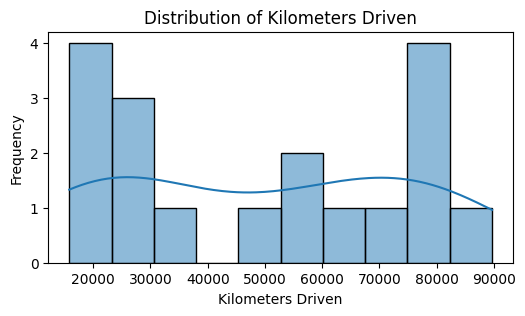

In [19]:
# Distribution of Kilometers Driven
plt.figure(figsize=(6, 3))
sns.histplot(df['Kilometers_Driven'], kde=True, bins=10)
plt.title('Distribution of Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Frequency')
plt.show()

**Conclusion:** The distribution of kilometers driven is right-skewed, indicating that most cars in the dataset have lower mileage, with some high-mileage outliers.

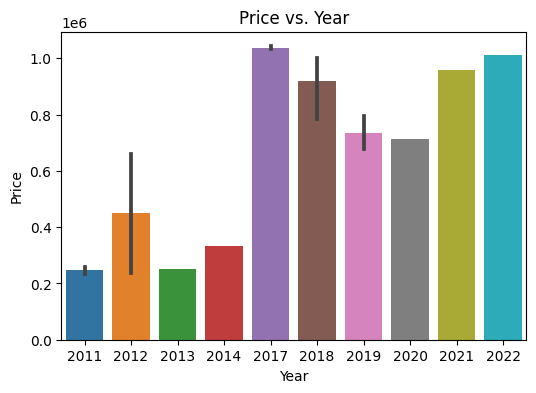

In [20]:
# Price vs. Year
plt.figure(figsize=(6, 4))
sns.barplot(x='Year', y='Price', data=df)
plt.title('Price vs. Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

**Conclusion:** There is a positive correlation between the car's manufacturing year and its price, suggesting newer cars tend to be more expensive.

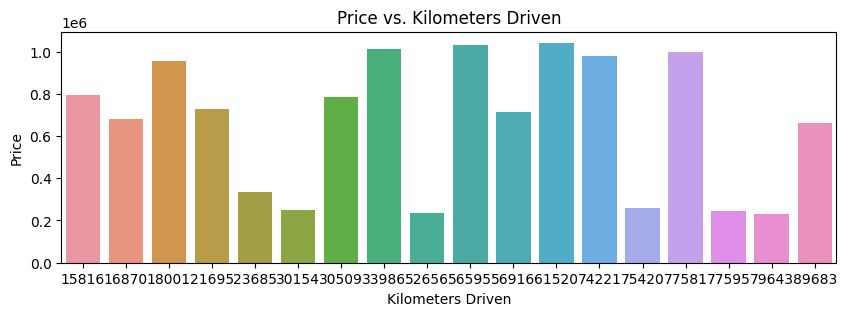

In [21]:
# Price vs. Kilometers Driven
plt.figure(figsize=(10, 3))
sns.barplot(x='Kilometers_Driven', y='Price', data=df)
plt.title('Price vs. Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price')
plt.show()

**Conclusion:** A negative correlation is visible between kilometers driven and price, implying that cars with higher mileage generally have lower prices.

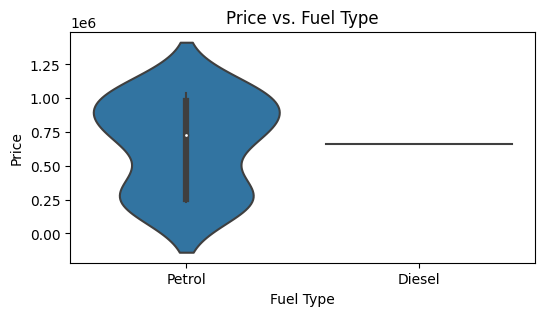

In [22]:
# Price vs. Fuel Type
plt.figure(figsize=(6, 3))
sns.violinplot(x='Fuel_Type', y='Price', data=df)
plt.title('Price vs. Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()

**Conclusion:** This visualization shows how prices vary across different fuel types. Further analysis might be needed to draw specific conclusions.

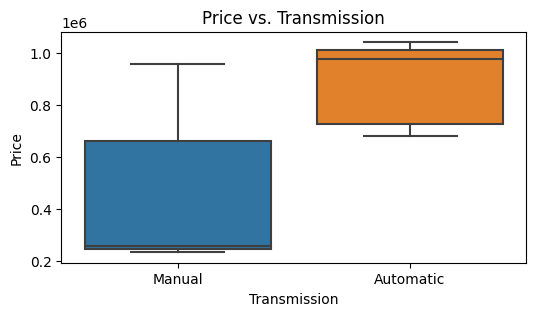

In [23]:
# Price vs. Transmission
plt.figure(figsize=(6, 3))
sns.boxplot(x='Transmission', y='Price', data=df)
plt.title('Price vs. Transmission')
plt.xlabel('Transmission')
plt.ylabel('Price')
plt.show()

**Conclusion:** This plot illustrates the price differences between transmission types. Further analysis might be needed to determine if there's a significant price difference between manual and automatic transmissions.

**The EDA provides valuable insights into the Toyota car dataset. We can see clear relationships between price and factors such as the car's age and mileage. To draw more specific conclusions, we might need to perform additional statistical analyses or create more detailed visualizations.** 

# Label Encoding:

In [24]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the columns
df['Fuel_Type'] = label_encoder.fit_transform(df['Fuel_Type'])
df['Transmission'] = label_encoder.fit_transform(df['Transmission'])

## One-hot encode categorical variables
### X = pd.get_dummies(X, columns=['Fuel_Type', 'Transmission'], drop_first=True)

**Conclusion:** 'petrol' could be 1 and 'diesel' could be 0. Similarly, 'manual' could be 1 and 'automatic' could be 0.

In [25]:
df.head()

,Car_Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Price
0,Toyota Etios Liva G,2012,52656,1,1,237000
1,Toyota YARIS VX MT,2018,30509,1,1,783000
2,Toyota URBAN CRUISER PREMIUM GRADE MT,2021,18001,1,1,957000
3,Toyota Etios Liva G,2011,79643,1,1,233000
4,Toyota URBAN CRUISER PREMIUM GRADE AT,2022,33986,1,0,1011000


# Model Building:

In [26]:
# Step 1: Identify Input and Output

# Define features and target
X = df.drop(['Price','Car_Name'], axis=1)  # Features
y = df['Price']               # Target 
print(X.shape, y.shape)

(18, 4) (18,)


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(14, 4) (14,)
(4, 4) (4,)


In [28]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression

# Initialize the model
lr_model = LinearRegression()

# Train the model on the training data
lr_model.fit(X_train_scaled, y_train)
# Predict the target variable for the testing data
y_pred_lr = lr_model.predict(X_test_scaled)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 98338.16986622484
Mean Squared Error (MSE): 11321816922.884563
R-squared (R2): 0.814835829357638


In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train_scaled, y_train)

# Predict the target variable for the testing data
y_pred_rf = rf_model.predict(X_test_scaled)

# Calculate evaluation metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor:")
print("Mean Absolute Error (MAE):", mae_rf)
print("Mean Squared Error (MSE):", mse_rf)
print("R-squared (R2):", r2_rf)

Random Forest Regressor:
Mean Absolute Error (MAE): 70435.0
Mean Squared Error (MSE): 6199641550.0
R-squared (R2): 0.8986071322558356
